In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.patches import Rectangle

In [6]:

def criar_indices(min_i, max_i, min_j, max_j):
    import itertools
    L = list(itertools.product(range(min_i, max_i), range(min_j, max_j)))
    idx_i = np.array([e[0] for e in L])
    idx_j = np.array([e[1] for e in L])
    idx = np.vstack( (idx_i, idx_j) )
    return idx

(427, 640, 3)


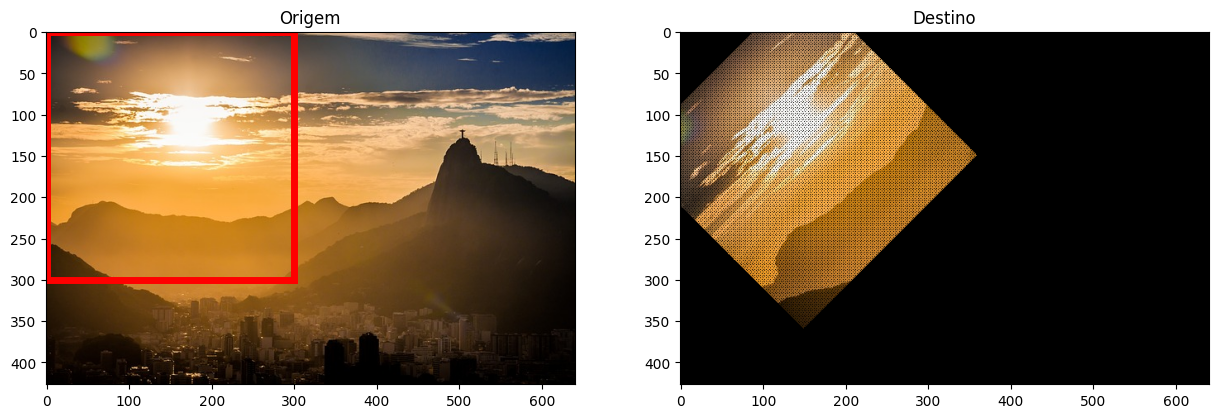

In [32]:
image = mpimg.imread("rio_de_janeiro.jpg")
image_ = np.zeros_like(image)

X = criar_indices(0, 300, 0, 300)
X = np.vstack ( (X, np.ones( X.shape[1]) ) )

T = np.array([[1, 0, -150], [0, 1, -150], [0, 0,1]])
T2 = np.array([[1, 0, 150], [0, 1, 150], [0, 0,1]])
R = np.array([[0.7, -0.7, 0], [0.7, 0.7, 0], [0, 0,1]])

Xd = T2 @ R @ T @ X
Xd = Xd.astype(int)
X = X.astype(int)

# Troque este código pelo seu código de filtragem de pixels
Xd[0,:] = np.clip(Xd[0,:], 0, image.shape[0])
Xd[1,:] = np.clip(Xd[1,:], 0, image.shape[1])

image_[Xd[0,:], Xd[1,:], :] = image[X[0,:], X[1,:], :]

print(image_.shape)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(image)
# Adiciona o retângulo indicando a área que foi recortada:
plt.gca().add_patch(Rectangle((0,0),300,300,linewidth=5,edgecolor='r',facecolor='none'))

plt.title('Origem')
plt.subplot(1,2,2)
plt.imshow(image_)
plt.title('Destino')
plt.show()


In [33]:
import numpy as np

# Instalar a biblioteca cv2 pode ser um pouco demorado. Não deixe para ultima hora!
import cv2 as cv

def run():
    # Essa função abre a câmera. Depois desta linha, a luz de câmera (se seu computador tiver) deve ligar.
    cap = cv.VideoCapture(0)

    # Aqui, defino a largura e a altura da imagem com a qual quero trabalhar.
    # Dica: imagens menores precisam de menos processamento!!!
    width = 320
    height = 240

    # Talvez o programa não consiga abrir a câmera. Verifique se há outros dispositivos acessando sua câmera!
    if not cap.isOpened():
        print("Não consegui abrir a câmera!")
        exit()

    # Esse loop é igual a um loop de jogo: ele encerra quando apertamos 'q' no teclado.
    while True:
        # Captura um frame da câmera
        ret, frame = cap.read()

        # A variável `ret` indica se conseguimos capturar um frame
        if not ret:
            print("Não consegui capturar frame!")
            break

        # Mudo o tamanho do meu frame para reduzir o processamento necessário
        # nas próximas etapas
        frame = cv.resize(frame, (width,height), interpolation =cv.INTER_AREA)

        # A variável image é um np.array com shape=(width, height, colors)
        image = np.array(frame).astype(float)/255

        #aqui que vamos mexer 

        # Agora, mostrar a imagem na tela!
        cv.imshow('Minha Imagem!', image)
        
        # Se aperto 'q', encerro o loop
        if cv.waitKey(1) == ord('q'):
            break

    # Ao sair do loop, vamos devolver cuidadosamente os recursos ao sistema!
    cap.release()
    cv.destroyAllWindows()

run()